In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')

In [29]:
data = pd.read_csv('CarPrice_Assignment.csv')
data

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [30]:
ds = data.copy()

In [31]:
ds.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
200    False
201    False
202    False
203    False
204    False
Length: 205, dtype: bool

In [32]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [60]:
ds.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
200    False
201    False
202    False
203    False
204    False
Length: 205, dtype: bool

In [33]:
ds.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [34]:
num = ds.select_dtypes(include = 'number')
cat = ds.select_dtypes(exclude = 'number')

print('Numerical Data')
display(num.head())
print('Categorical Data')
display(cat.head())

Numerical Data


,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


Categorical Data


,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,alfa-romero giulia,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero stelvio,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi 100 ls,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi 100ls,gas,std,four,sedan,4wd,front,ohc,five,mpfi


In [35]:
#ds.drop('car_ID',axis = 1, inplace = True)

In [36]:
ds.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [41]:
import matplotlib.pyplot as plt
def plotter(dataframe, col1, col2, col3, dependent):
    sns.set(style = 'darkgrid')
    plt.figure(figsize = (20,4))

    plt.subplot(1,3,1)
    sns.regplot(x = dataframe[col1], y = dataframe[dependent], ci = 0)
    plt.title(f"Relationship Btw {col1} and {dependent} is {dataframe[dependent].corr(dataframe[col1]).round(2)}")

    plt.subplot(1,3,2)
    sns.regplot(x = dataframe[col2], y = dataframe[dependent], ci = 0)
    plt.title(f"Relationship Btw {col2} and {dependent} is {dataframe[dependent].corr(dataframe[col2]).round(2)}")

    plt.subplot(1,3,3)
    sns.regplot(x = dataframe[col3], y = dataframe[dependent], ci = 0)
    plt.title(f"Relationship Btw {col3} and {dependent} is {dataframe[dependent].corr(dataframe[col3]).round(2)}")

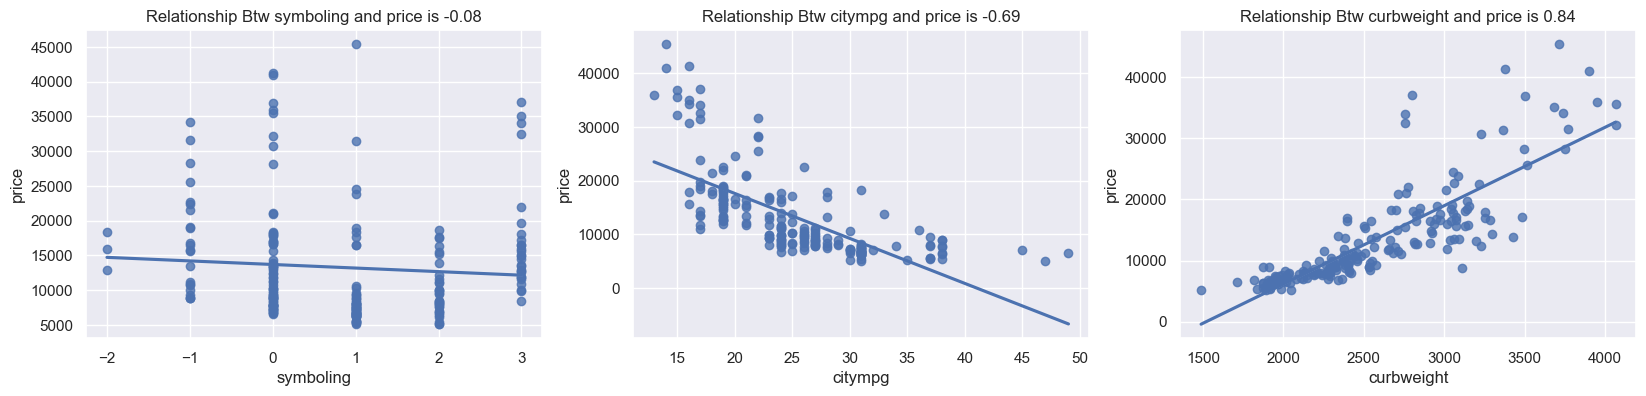

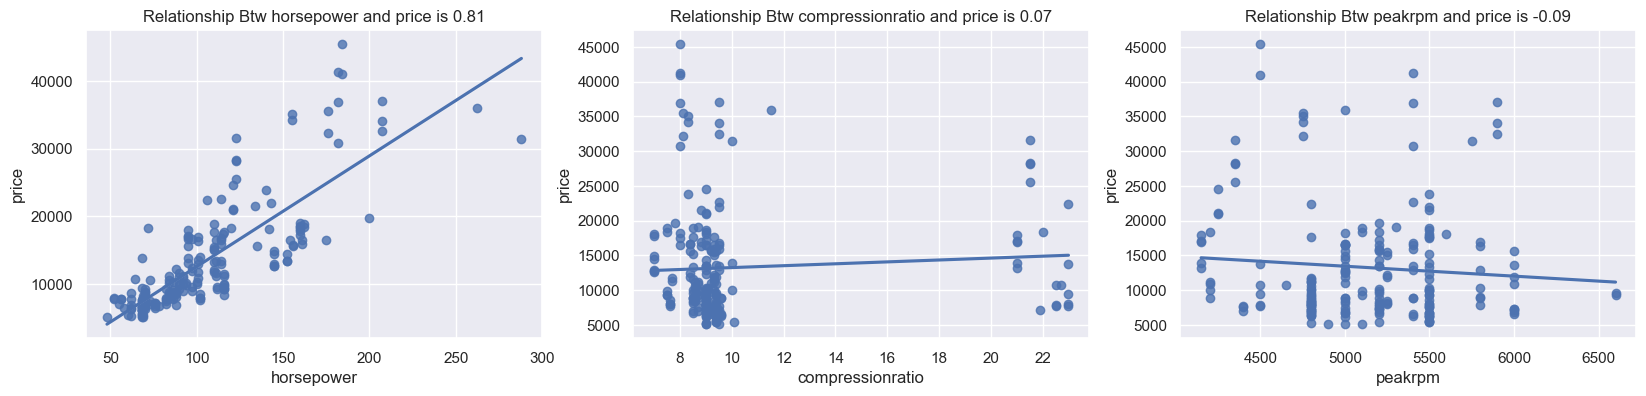

In [50]:
plotter(ds, 'symboling', 'citympg', 'curbweight', 'price')
plotter(ds, 'horsepower', 'compressionratio', 'peakrpm', 'price')

In [37]:
cols_to_scale = []
for i in num.columns:
    if ds[i].describe()[2] > 1500:
        cols_to_scale.append(i)

cols_to_scale

['price']

In [38]:
ds.drop('car_ID',axis = 1, inplace = True)

In [51]:
# LABEL ENCODE THE CATEGORICAL COLUMNS
from sklearn.preprocessing import LabelEncoder
encoded = {}  # ................................................................ Have a dictionary to save the encoders
for i in cat.columns: # ........................................................ Iterate through the new_categorical variables
    encode = LabelEncoder() # .................................................. Instantiate the encoder transformer
    ds[i] = encode.fit_transform(ds[i]) # ...................................... Encode the columns in ech iteration
    joblib.dump(encode, open(f'{i}_encoder.pkl', 'wb')) # ...................... Save the transformer to file for future reusal
    encoded[i +'_encoder'] = encode # .......................................... Save the transformer to the above stated dictionary for easy access

encoded

{'CarName_encoder': LabelEncoder(),
 'fueltype_encoder': LabelEncoder(),
 'aspiration_encoder': LabelEncoder(),
 'doornumber_encoder': LabelEncoder(),
 'carbody_encoder': LabelEncoder(),
 'drivewheel_encoder': LabelEncoder(),
 'enginelocation_encoder': LabelEncoder(),
 'enginetype_encoder': LabelEncoder(),
 'cylindernumber_encoder': LabelEncoder(),
 'fuelsystem_encoder': LabelEncoder()}

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

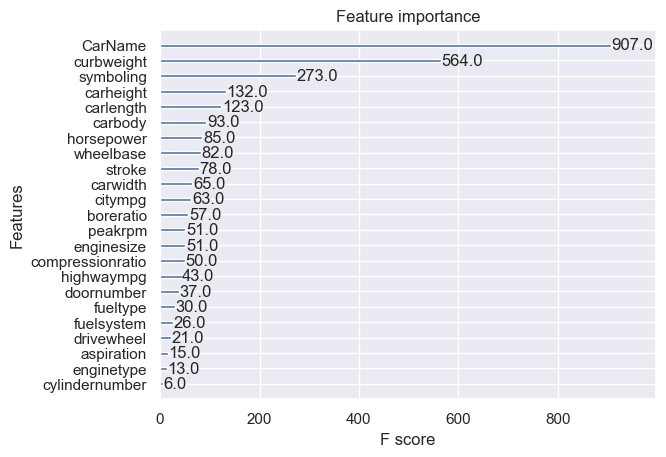

In [53]:
# conduct Feature Selection
# - Using XGBOOST to find feature importance

import matplotlib.pyplot as plt
import xgboost as xgb

model = xgb.XGBRegressor()


x = ds.drop('price', axis = 1)
y = ds.price

model.fit(x, y)

# Print feature importance scores
xgb.plot_importance(model, importance_type = 'weight')

In [55]:
sel_cols = ['CarName','curbweight','symboling','carheight','carlength','carbody','horsepower','price']
ds = ds[sel_cols]
ds.head()

,CarName,curbweight,symboling,carheight,carlength,carbody,horsepower,price
0,2,2548,3,48.8,168.8,0,111,13495.0
1,3,2548,3,48.8,168.8,0,111,16500.0
2,1,2823,1,52.4,171.2,2,154,16500.0
3,4,2337,2,54.3,176.6,3,102,13950.0
4,5,2824,2,54.3,176.6,3,115,17450.0


In [56]:
# Modelling
from sklearn.model_selection import train_test_split

x = ds.drop('price', axis = 1)
y = ds.price

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.20, random_state = 90)
print(f'Xtrain: {xtrain.shape}')
print(f'Xtest: {xtest.shape}')
print(f'Ytrain: {ytrain.shape}')
print(f'Ytest: {ytest.shape}')

Xtrain: (164, 7)
Xtest: (41, 7)
Ytrain: (164,)
Ytest: (41,)


In [57]:
#algorithm

from xgboost import XGBRegressor
from sklearn.metrics import r2_score
xgb = XGBRegressor()

xgb.fit(xtrain, ytrain)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [58]:
cross_validate = xgb.predict(xtrain)
score = r2_score(cross_validate, ytrain).round(2) * 100
if score < 70:
    print(f'The Model is Underfitting as the score is: {score}%')
else:
    print(f'The Model Score {score}% is good')

The Model Score 100.0% is good


In [59]:
test_pred =  xgb.predict(xtest)
test_score = r2_score(test_pred, ytest).round(2) * 100
if score - test_score > 20:
    print(f'The Model is Overfitting as the score is: {test_score}%')
else:
    print(f'The Model Score {test_score}% is Optimal')

The Model Score 89.0% is Optimal


In [ ]:
#to save your model
joblib.dump(xgb, open('CarPriceModel.pkl','wb'))